Maybe we define new structure which captures the input parameters specific to each problem in one place (`scale_factor`).
We need to define a range on `d` that is also function dependent (that we could adjust by hand). 

We need to generate three graphs: 
- Histogram of Number of `loc_min` points were found, (so outputs of the Optim routine) and what percentage of them is within a small distance of a critical point of the approximant. As a function of the degree `d` of the approximant.


In [1]:
using Pkg
using Revise 
Pkg.activate("../../.")
using Globtim
using DynamicPolynomials, DataFrames
using ProgressLogging
using Optim
using CairoMakie
CairoMakie.activate!

  Activating project at `~/globtim`


activate! (generic function with 1 method)

Can a function export "Optional attributes" like just some constants or its optimal domain of definition? --> works. 

In [2]:
params = load_function_params("Deuflhard_4d")
TR = test_input(Deuflhard_4d;
    dim=params.dim,
    center=params.center,
    GN=params.num_samples,
    sample_range=params.sample_range,
    tolerance=params.tolerance)

@polyvar(x[1:TR.dim]); # Define polynomial ring 

In [24]:
d_min, d_max = 2, 10

(10, 30)

In [25]:
results = analyze_degrees(TR, x, d_min, d_max, step=1, tol_dist=0.5)

current L2-norm: 212.6782389995443
Dimension m of the vector space: 66

=== Starting MSolve Parser (dimension: 2) ===
Processed 65 points (0.0s)
Processing point 1 of 61
Optimization has converged: ✓
Processing point 2 of 61
Optimization has converged: ✓
Processing point 3 of 61
Optimization has converged: ✓
Processing point 4 of 61
Optimization has converged: ✓
Processing point 5 of 61
Optimization has converged: ✓
Processing point 6 of 61
Optimization has converged: ✓
Processing point 7 of 61
Optimization has converged: ✓
Processing point 8 of 61
Optimization has converged: ✓
Processing point 9 of 61
Optimization has converged: ✓
Processing point 10 of 61
Optimization has converged: ✓
Processing point 11 of 61
Optimization has converged: ✓
Processing point 12 of 61
Optimization has converged: ✓
Processing point 13 of 61
Optimization has converged: ✓
Processing point 14 of 61
Optimization has converged: ✓
Processing point 15 of 61
Optimization has converged: ✓
Processing point 16 of 6

Excessive output truncated after 524325 bytes.

Optimization has converged: ✓
Processing point 154 of 287
Optimization has converged: ✓
Processing point 155 of 287
Optimization has converged: ✓
Processing point 156 of 287
Optimization has converged: ✓
Processing point 157 of 287
Optimization has converged: ✓
Processing point 158 of 287
Optimization has converged: ✓
Processing point 159 of 287
Optimization has converged: ✓
Processing point 160 of 287
Optimization has converged: ✓
Processing point 161 of 287
Optimization has converged: ✓
Processing point 162 of 287
Optimization has converged: ✓
Processing point 163 of 287
Optimization has converged: ✓
Processing point 164 of 287
Optimization has converged: ✓
Processing point 165 of 287
Optimization has converged: ✓
Processing point 166 of 287
Optimization has converged: ✓
Processing point 167 of 287
Optimization has converged: ✓
Processing point 168 of 287
Optimization has converged: ✓
Processing point 169 of 287
Optimization has converged: ✓
Processing point 170 of 287
Optimization h

Dict{Int64, @NamedTuple{df::DataFrame, df_min::DataFrame, convergence_stats::NamedTuple, discrete_l2::Float64}} with 21 entries:
  16 => @NamedTuple{df::DataFrame, df_min::DataFrame, convergence_stats::NamedT…
  20 => @NamedTuple{df::DataFrame, df_min::DataFrame, convergence_stats::NamedT…
  12 => @NamedTuple{df::DataFrame, df_min::DataFrame, convergence_stats::NamedT…
  24 => @NamedTuple{df::DataFrame, df_min::DataFrame, convergence_stats::NamedT…
  28 => @NamedTuple{df::DataFrame, df_min::DataFrame, convergence_stats::NamedT…
  30 => @NamedTuple{df::DataFrame, df_min::DataFrame, convergence_stats::NamedT…
  17 => @NamedTuple{df::DataFrame, df_min::DataFrame, convergence_stats::NamedT…
  23 => @NamedTuple{df::DataFrame, df_min::DataFrame, convergence_stats::NamedT…
  19 => @NamedTuple{df::DataFrame, df_min::DataFrame, convergence_stats::NamedT…
  22 => @NamedTuple{df::DataFrame, df_min::DataFrame, convergence_stats::NamedT…
  11 => @NamedTuple{df::DataFrame, df_min::DataFrame, converg

In [40]:
new_results = analyze_degrees(TR, x, d_min, d_max, results, tol_dist=1.)

Dict{Int64, @NamedTuple{df::DataFrame, df_min::DataFrame, convergence_stats::NamedTuple, discrete_l2::Float64}} with 11 entries:
  16 => @NamedTuple{df::DataFrame, df_min::DataFrame, convergence_stats::NamedT…
  20 => @NamedTuple{df::DataFrame, df_min::DataFrame, convergence_stats::NamedT…
  12 => @NamedTuple{df::DataFrame, df_min::DataFrame, convergence_stats::NamedT…
  24 => @NamedTuple{df::DataFrame, df_min::DataFrame, convergence_stats::NamedT…
  28 => @NamedTuple{df::DataFrame, df_min::DataFrame, convergence_stats::NamedT…
  30 => @NamedTuple{df::DataFrame, df_min::DataFrame, convergence_stats::NamedT…
  22 => @NamedTuple{df::DataFrame, df_min::DataFrame, convergence_stats::NamedT…
  14 => @NamedTuple{df::DataFrame, df_min::DataFrame, convergence_stats::NamedT…
  10 => @NamedTuple{df::DataFrame, df_min::DataFrame, convergence_stats::NamedT…
  18 => @NamedTuple{df::DataFrame, df_min::DataFrame, convergence_stats::NamedT…
  26 => @NamedTuple{df::DataFrame, df_min::DataFrame, converg

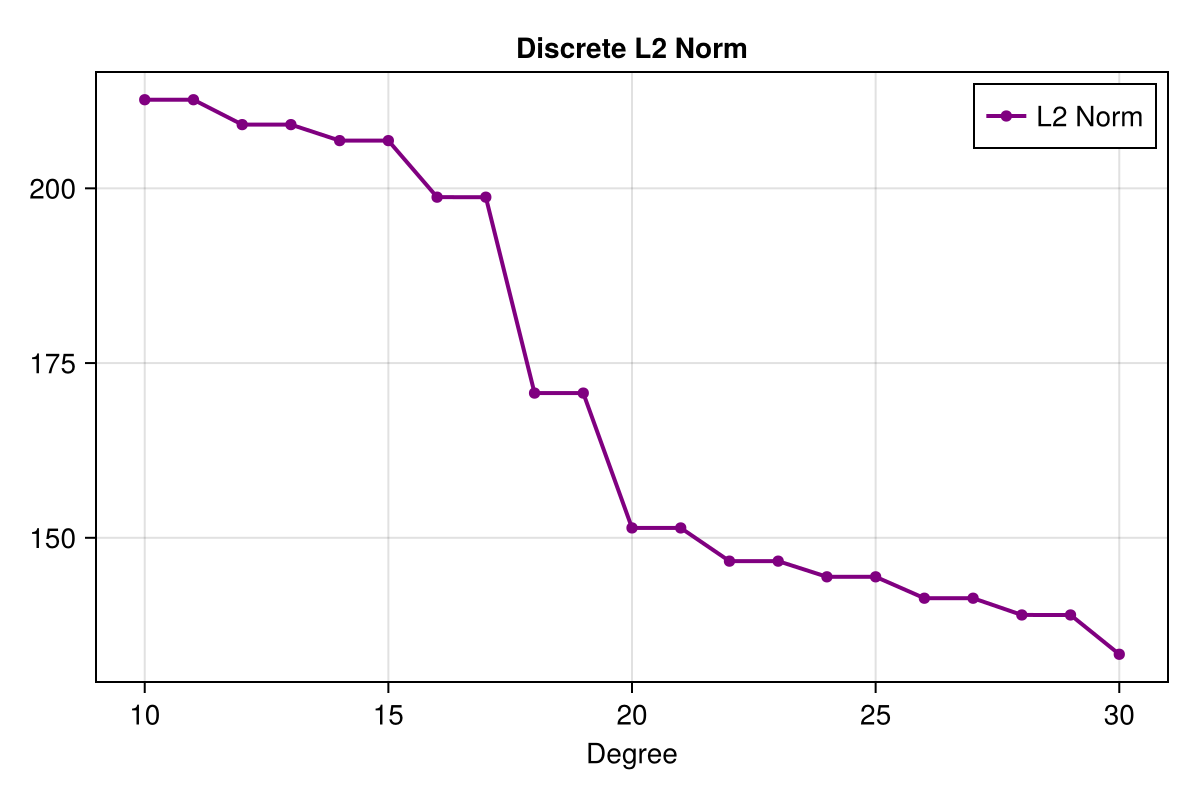

CairoMakie.Screen{IMAGE}


In [28]:
fig_1 = plot_discrete_l2(results, d_min, d_max, 1)
# save("discrete_l2.pdf", fig_1)
display(fig_1)

In [39]:
fig_2 = capture_histogram(new_results, d_min, d_max, 1, show_legend=false)
# save("histogram.pdf", fig_2)
display(fig_2)

KeyError: KeyError: key 11 not found

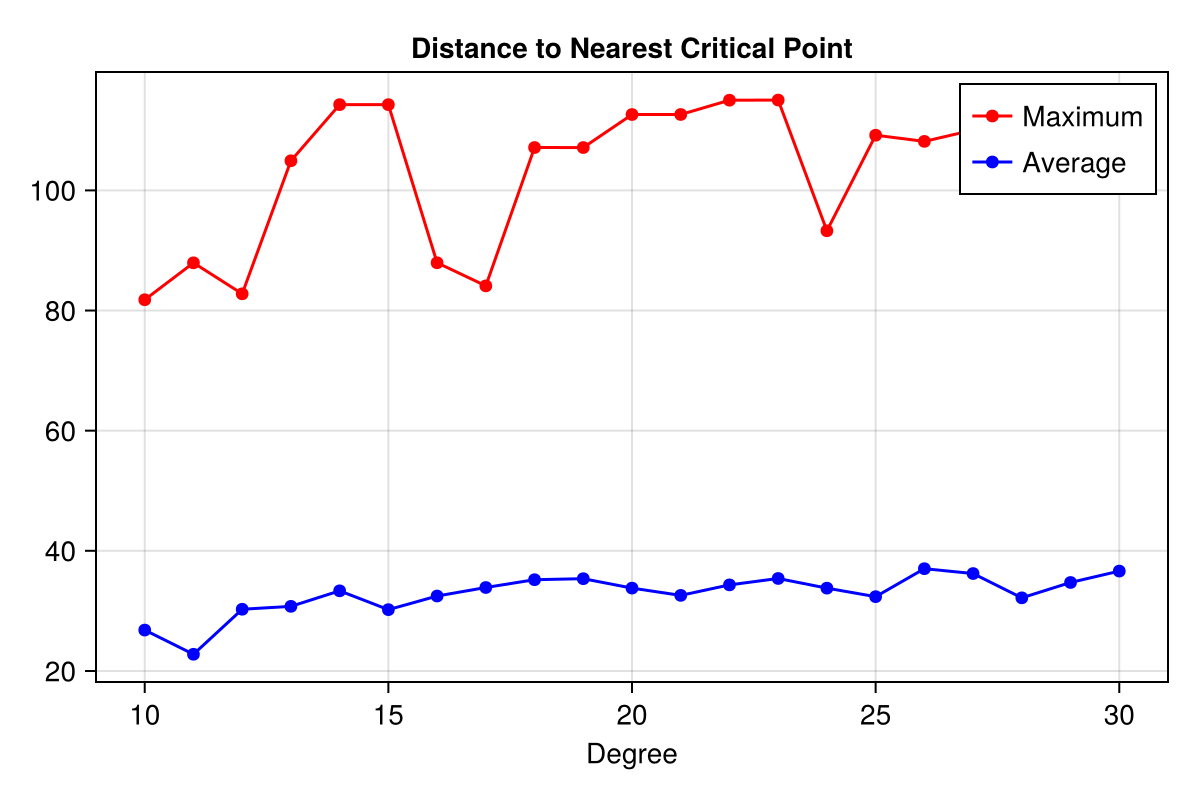

CairoMakie.Screen{IMAGE}


In [31]:
fig_3 = plot_convergence_analysis(results, d_min, d_max, 1)
# save("convergence_analysis.pdf", fig_3)
display(fig_3)